In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#Deleting Id Column
df=df.iloc[:,1:]

In [8]:
df.head()

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3.5,1.4,0.2,Iris-setosa
1,3.0,1.4,0.2,Iris-setosa
2,3.2,1.3,0.2,Iris-setosa
3,3.1,1.5,0.2,Iris-setosa
4,3.6,1.4,0.2,Iris-setosa


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
encod=LabelEncoder()

In [11]:
df['Species']=encod.fit_transform(df['Species'])

In [12]:
df.head()

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0


In [13]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [14]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [15]:
import seaborn as sbs
import matplotlib.pyplot as plt

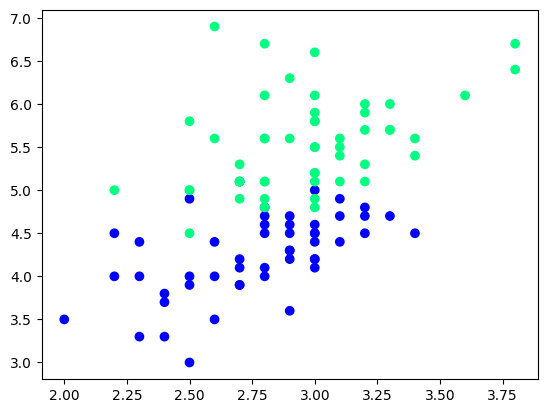

In [17]:
plt.scatter(df["SepalWidthCm"],df["PetalLengthCm"],c=df['Species'],cmap='winter')

In [19]:
df_train=df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
85,3.4,4.5,1
94,2.7,4.2,1
86,3.1,4.7,1
59,2.7,3.9,1
72,2.5,4.9,1
76,2.8,4.8,1
93,2.3,3.3,1
69,2.5,3.9,1
73,2.8,4.7,1
91,3.0,4.6,1


In [20]:
# Taking only 10 rows for training
#Sample is used to chooose random rows in the data
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [21]:
df_train

,SepalWidthCm,PetalLengthCm,Species
103,2.9,5.6,2
68,2.2,4.5,1
102,3.0,5.9,2
50,3.2,4.7,1
67,2.7,4.1,1
94,2.7,4.2,1
131,3.8,6.4,2
130,2.8,6.1,2
104,3.0,5.8,2
70,3.2,4.8,1


In [22]:
df_val

,SepalWidthCm,PetalLengthCm,Species
143,3.2,5.9,2
76,2.8,4.8,1
134,2.6,5.6,2
55,2.8,4.5,1
146,2.5,5.0,2


In [23]:
df_test

,SepalWidthCm,PetalLengthCm,Species
147,3.0,5.2,2
97,2.9,4.3,1
52,3.1,4.9,1
140,3.1,5.6,2
114,2.8,5.1,2


In [26]:
X_test=df_val.iloc[:,0:2].values
y_test=df_val.iloc[:,-1].values

In [27]:
y_test

array([2, 1, 2, 1, 2])

# 1.Bagging

# A.training

In [28]:
#data for Tree 1
df_bag=df_train.sample(8,replace=True)

X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
104,3.0,5.8,2
102,3.0,5.9,2
130,2.8,6.1,2
130,2.8,6.1,2
131,3.8,6.4,2
70,3.2,4.8,1
102,3.0,5.9,2
102,3.0,5.9,2


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [30]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

In [31]:
df_bag1=DecisionTreeClassifier()

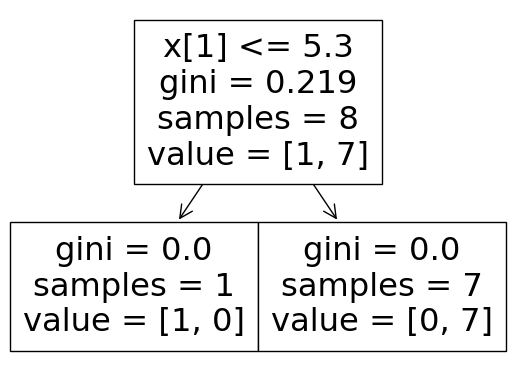

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


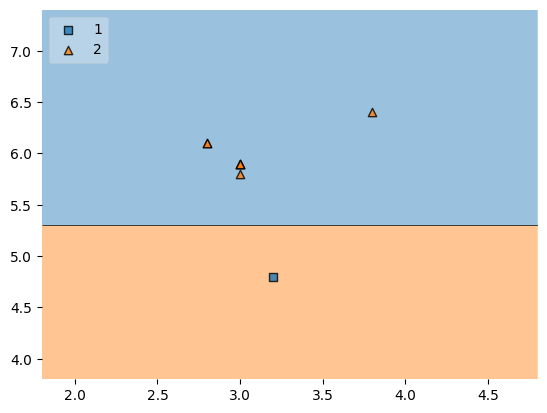

In [34]:
evaluate(df_bag1,X,y)

In [35]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

#### Replace=True is used to make sure that , rows are kept repetitng in the sample data

In [36]:
#fetch X and y
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

In [37]:
df_bag

,SepalWidthCm,PetalLengthCm,Species
70,3.2,4.8,1
50,3.2,4.7,1
94,2.7,4.2,1
131,3.8,6.4,2
103,2.9,5.6,2
102,3.0,5.9,2
67,2.7,4.1,1
67,2.7,4.1,1


In [38]:
dt_bag2=DecisionTreeClassifier()

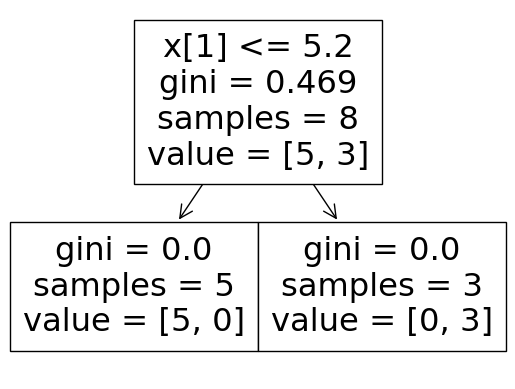

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


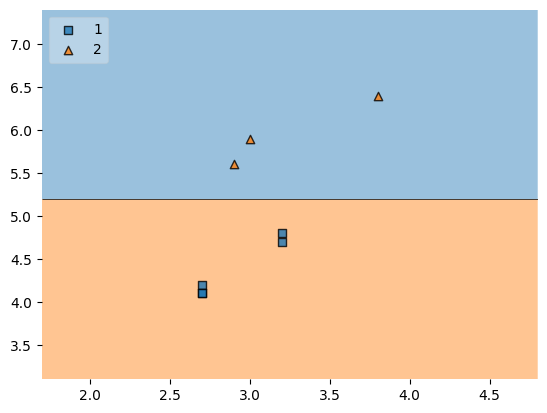

In [39]:
evaluate(dt_bag2,X,y)

In [40]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
103,2.9,5.6,2
131,3.8,6.4,2
67,2.7,4.1,1
50,3.2,4.7,1
104,3.0,5.8,2
68,2.2,4.5,1
102,3.0,5.9,2
67,2.7,4.1,1


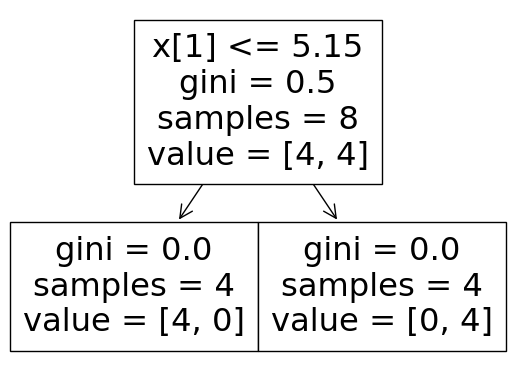

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


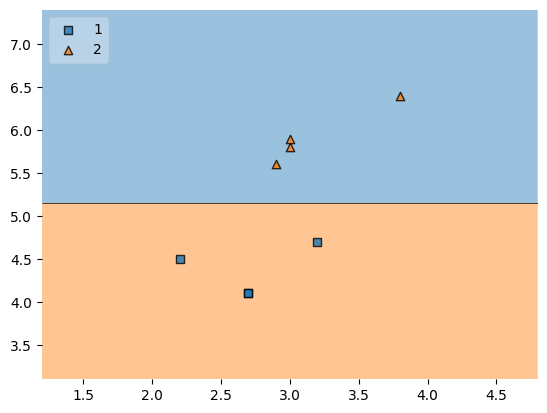

In [41]:
dt_bag3=DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# B.Predict

In [42]:
df_test

,SepalWidthCm,PetalLengthCm,Species
147,3.0,5.2,2
97,2.9,4.3,1
52,3.1,4.9,1
140,3.1,5.6,2
114,2.8,5.1,2


In [51]:
print("Predictor 1",df_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# 2.Pasting 

## The only Difference between Pasting and Bagging is , Rows are not repeated in pasting while in bagging rows are repeated in sample data

In [52]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
103,2.9,5.6,2
68,2.2,4.5,1
102,3.0,5.9,2
50,3.2,4.7,1
67,2.7,4.1,1
94,2.7,4.2,1
131,3.8,6.4,2
130,2.8,6.1,2
104,3.0,5.8,2
70,3.2,4.8,1


In [53]:
#By default value of Replace is False in Sample Function(sample=False)
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
94,2.7,4.2,1
68,2.2,4.5,1
104,3.0,5.8,2
50,3.2,4.7,1
103,2.9,5.6,2
130,2.8,6.1,2
67,2.7,4.1,1
70,3.2,4.8,1


# 3.Random Subspaces

## Random subspaces chooses the Random Columns for sampling in data

In [54]:
df1 = pd.read_csv('/kaggle/input/iris/Iris.csv')
df1 = df1.sample(10)

In [55]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
148,149,6.2,3.4,5.4,2.3,Iris-virginica
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
141,142,6.9,3.1,5.1,2.3,Iris-virginica
112,113,6.8,3.0,5.5,2.1,Iris-virginica
139,140,6.9,3.1,5.4,2.1,Iris-virginica
6,7,4.6,3.4,1.4,0.3,Iris-setosa
21,22,5.1,3.7,1.5,0.4,Iris-setosa
19,20,5.1,3.8,1.5,0.3,Iris-setosa
66,67,5.6,3.0,4.5,1.5,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [56]:
df1.sample(2,replace=True,axis=1)
#Axis 1 stands for selecting rows , by default value of axis is 0 which is for row
#Here we are selecting random 2 columns from the data

,PetalLengthCm,PetalWidthCm
148,5.4,2.3
62,4.0,1.0
141,5.1,2.3
112,5.5,2.1
139,5.4,2.1
6,1.4,0.3
21,1.5,0.4
19,1.5,0.3
66,4.5,1.5
54,4.6,1.5


# 4.Random Patches

## Random Patches Technique is the combination of both previous technique , Such that it will randomly chooses the Column and randomly chooses the rows from it to create a sample Data

In [57]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
148,149,6.2,3.4,5.4,2.3,Iris-virginica
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
141,142,6.9,3.1,5.1,2.3,Iris-virginica
112,113,6.8,3.0,5.5,2.1,Iris-virginica
139,140,6.9,3.1,5.4,2.1,Iris-virginica
6,7,4.6,3.4,1.4,0.3,Iris-setosa
21,22,5.1,3.7,1.5,0.4,Iris-setosa
19,20,5.1,3.8,1.5,0.3,Iris-setosa
66,67,5.6,3.0,4.5,1.5,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [59]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)
#Here you can see that , we are using 2 sample functions to choose random column and random rows
#Repetition of row is Allow in this type of Method.

,PetalWidthCm,Id
139,2.1,140
66,1.5,67
141,2.3,142
66,1.5,67
139,2.1,140
62,1.0,63
21,0.4,22
21,0.4,22


# Conclude